In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.circuit.random import random_circuit
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *
from rco import *
from data_encoders import *


#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=4)

### Fitting Random Circuits

In [2]:
np.random.seed(42)

n_qubits = 4
depth = 20
circuit = random_circuit(n_qubits, depth)

In [ ]:
np.random.seed(42)
rco1 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 4), 
           sampler = AverageBit(), 
           optimizer = Adam(lr=0.1),
           divisor = 5, 
           shots = 100000,
           tol = 1e-3,
           warm_start=True)

In [ ]:
np.random.seed(42)
rco1.fit(circuit)

In [ ]:
rco1.predict(circuit)

In [ ]:
rco2 = RCO(ansatz = Ansatz(reps = 4), 
           sampler = ZeroBit(), 
           optimizer = Adam(lr=0.1),
           divisor = 5, 
           shots = 100000,
           tol = 1e-3,
           warm_start=True)

In [ ]:
np.random.seed(42)
rco2.fit(circuit)

In [ ]:
rco2.predict(circuit)

### Fitting Amplitude Encoding

#### 4 qubits

In [2]:
np.random.seed(42)
x = np.random.normal(0, 1, (16))
x = x/np.sqrt(np.sum(x**2))

storage = qk.QuantumRegister(4)
circuit = qk.QuantumCircuit(storage)
circuit = amplitude_encoding(x, circuit, storage)
print(len(circuit))

151


In [3]:
np.random.seed(42)
rco_amplitude_encoder1 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 4), 
                       sampler = AverageBit(), 
                       optimizer = Adam(lr=0.1),
                       divisor = 1, 
                       shots = 100000,
                       tol = 1e-3,
                       warm_start=False)

In [4]:
rco_amplitude_encoder1.fit(circuit)

0/1 iterations
1: 0.96188
2: 0.9456
3: 0.91822
4: 0.88225
5: 0.83019
6: 0.76515
7: 0.68557
8: 0.6101
9: 0.55183
10: 0.51378
11: 0.48785999999999996
12: 0.46395
13: 0.45043999999999995
14: 0.43794
15: 0.42630999999999997
16: 0.41755
17: 0.40791
18: 0.39647
19: 0.37900999999999996
20: 0.35829999999999995
21: 0.33531
22: 0.31154000000000004
23: 0.27785000000000004
24: 0.24629
25: 0.21509999999999996
26: 0.18511999999999995
27: 0.16271999999999998
28: 0.14851000000000003
29: 0.14326000000000005
30: 0.13870000000000005
31: 0.13639
32: 0.13183999999999996
33: 0.13317
34: 0.13888999999999996
35: 0.13788999999999996
36: 0.13049999999999995
37: 0.12497000000000003
38: 0.11873999999999996
39: 0.11065999999999998
40: 0.10526999999999997
41: 0.10150000000000003
42: 0.09891000000000005
43: 0.09762000000000004
44: 0.0928
45: 0.09153999999999995
46: 0.08943999999999996
47: 0.08855000000000002
48: 0.08862999999999999
49: 0.08826
50: 0.08772000000000002
51: 0.08689999999999998
52: 0.08231
53: 0.0799600

In [5]:
rco_amplitude_encoder1.predict(circuit)

0.001040000000000041

In [6]:
np.random.seed(42)
rco_amplitude_encoder2 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 4), 
                       sampler = AverageBit(), 
                       optimizer = Adam(lr=0.1),
                       divisor = 5, 
                       shots = 100000,
                       tol = 1e-3,
                       warm_start=False)

In [7]:
rco_amplitude_encoder2.fit(circuit)

0/5 iterations
1: 0.82423
2: 0.70653
3: 0.6206
4: 0.55526
5: 0.51744
6: 0.49529999999999996
7: 0.47080999999999995
8: 0.42418
9: 0.37424999999999997
10: 0.32802
11: 0.28949
12: 0.26354
13: 0.23777000000000004
14: 0.20745999999999998
15: 0.17767999999999995
16: 0.15657
17: 0.14207000000000003
18: 0.13556999999999997
19: 0.12321000000000004
20: 0.11055999999999999
21: 0.09552000000000005
22: 0.08382999999999996
23: 0.08472999999999997
24: 0.08950000000000002
25: 0.09397
26: 0.09553999999999996
27: 0.09179999999999999
28: 0.08865
29: 0.08270999999999995
30: 0.07445000000000002
31: 0.06596000000000002
32: 0.057559999999999945
33: 0.04691000000000001
34: 0.04193000000000002
35: 0.038470000000000004
36: 0.03656000000000004
37: 0.03376000000000001
38: 0.03190000000000004
39: 0.03076000000000001
40: 0.02893000000000001
41: 0.02522000000000002
42: 0.022150000000000003
43: 0.015880000000000005
44: 0.012290000000000023
45: 0.009820000000000051
46: 0.010090000000000043
47: 0.009469999999999978
48:

11: 0.18722000000000005
12: 0.14678999999999998
13: 0.13241000000000003
14: 0.13414000000000004
15: 0.13453000000000004
16: 0.13285000000000002
17: 0.13187000000000004
18: 0.13305999999999996
19: 0.13143000000000005
20: 0.13007999999999997
21: 0.12951999999999997
22: 0.12483999999999995
23: 0.11831999999999998
24: 0.10912999999999995
25: 0.09516000000000002
26: 0.08228999999999997
27: 0.07389000000000001
28: 0.06603999999999999
29: 0.06128
30: 0.054340000000000055
31: 0.05152000000000001
32: 0.047839999999999994
33: 0.04439000000000004
34: 0.03893000000000002
35: 0.03478000000000003
36: 0.02905000000000002
37: 0.025920000000000054
38: 0.022669999999999968
39: 0.019959999999999978
40: 0.018199999999999994
41: 0.01685000000000003
42: 0.015050000000000008
43: 0.014700000000000046
44: 0.013490000000000002
45: 0.013050000000000006
46: 0.011249999999999982
47: 0.010739999999999972
48: 0.010109999999999952
49: 0.009759999999999991
50: 0.007469999999999977
51: 0.006950000000000012
52: 0.004809

155: 0.002789999999999959
156: 0.00275000000000003
157: 0.002909999999999968
158: 0.0027199999999999447
159: 0.002929999999999988
160: 0.0024199999999999777
161: 0.0028799999999999937
162: 0.0027800000000000047
163: 0.0030000000000000027
164: 0.0031600000000000517
165: 0.003149999999999986
166: 0.002909999999999968
167: 0.0028200000000000447
168: 0.002990000000000048
169: 0.0026399999999999757
170: 0.0029000000000000137
171: 0.002789999999999959
172: 0.002569999999999961
173: 0.0025300000000000322
174: 0.0024199999999999777
175: 0.0026000000000000467
176: 0.0023800000000000487
177: 0.0025600000000000067
178: 0.0023400000000000087
179: 0.0023800000000000487
180: 0.0023100000000000342
181: 0.0023699999999999832
182: 0.0021600000000000508
183: 0.0022199999999999998
184: 0.002449999999999952
185: 0.0024399999999999977
186: 0.0022100000000000453
187: 0.0020799999999999708
188: 0.0024399999999999977
189: 0.0023199999999999887
190: 0.0022799999999999487
191: 0.0024699999999999722
192: 0.00205

In [8]:
rco_amplitude_encoder2.predict(circuit)

0.006839999999999957

#### 5 qubits

In [ ]:
np.random.seed(42)
x = np.random.normal(0, 1, (2**4))
x = x/np.sqrt(np.sum(x**2))

storage = qk.QuantumRegister(4, name="storage")
circuit = qk.QuantumCircuit(storage)
circuit = amplitude_encoding(x, circuit, storage)
print(len(circuit))
print(x)

In [ ]:
np.random.seed(42)
rco_amplitude_encoder3 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 5), 
                       sampler = AverageBit(), 
                       optimizer = Adam(lr=0.1),
                       divisor = 1, 
                       shots = 100000,
                       tol = 1e-3,
                       warm_start=False)

In [ ]:
rco_amplitude_encoder3.fit(circuit)

In [ ]:
np.random.seed(42)
rco_amplitude_encoder4 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = 5), 
                       sampler = AverageBit(), 
                       optimizer = Adam(lr=0.1),
                       divisor = 5, 
                       shots = 100000,
                       tol = 1e-3,
                       warm_start=False)

In [ ]:
rco_amplitude_encoder4.fit(circuit)

### Analyse Gradient

In [ ]:
np.random.seed(42)

grads_average_locals = []
grads_average_global = []

for i in tqdm(range(3,11)):  
    x = np.random.normal(0, 1, (i**2))
    x = x/np.sqrt(np.sum(x**2))

    storage = qk.QuantumRegister(i)
    circuit = qk.QuantumCircuit(storage)
    circuit = amplitude_encoding(x, circuit, storage)
    
    rco1 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = i),
               n_qubits=i,
               sampler = AverageBit(), 
               optimizer = Adam(lr=0.1),
               divisor = 1, 
               shots = 100000,
               tol = 1e-3,
               warm_start=False)
    
    rco2 = RCO(ansatz = Ansatz(blocks = ["entangle", "ry", "rz"], reps = i),
               n_qubits=i,
               sampler = ZeroBit(), 
               optimizer = Adam(lr=0.1),
               divisor = 1, 
               shots = 100000,
                       tol = 1e-3,
                       warm_start=False)
    
    grads1 = rco1.gradient(circuit, rco1.params[0, :])
    grads2 = rco2.gradient(circuit, rco2.params[0, :])
    
    grads_average_locals.append(np.mean(np.abs(grads1)))
    grads_average_global.append(np.mean(np.abs(grads2)))
    

  0%|          | 0/8 [00:00<?, ?it/s]

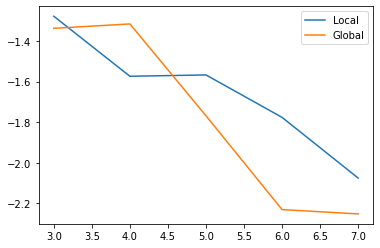

In [19]:
y1 = np.log10(np.array(grads_average_locals))
y2 = np.log10(np.array(grads_average_global))

plt.plot(list(range(3,8)), y1)
plt.plot(list(range(3,8)), y2)
plt.legend(["Local", "Global"])
plt.show()